In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cleaned_hotel_bookings.csv")
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0        

In [15]:
sns.set_style("whitegrid")

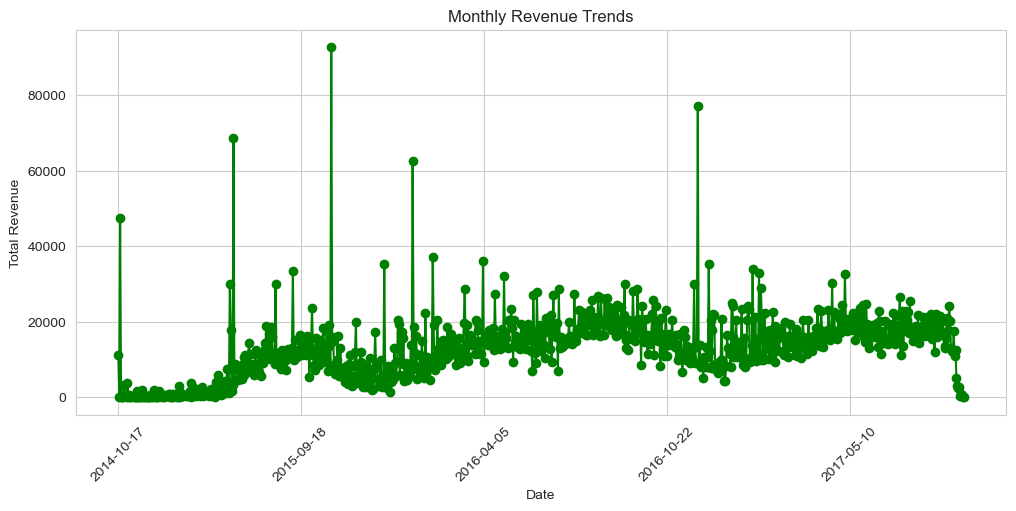

In [19]:
#Revenue Trends Over Time
plt.figure(figsize=(12,5))
df.groupby(df['reservation_status_date'].astype(str))['adr'].sum().plot(kind='line', marker='o', color='green')
plt.title("Monthly Revenue Trends")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [25]:

monthly_revenue = df.groupby(df['reservation_status_date'].dt.to_period("M"))['adr'].sum()
print(monthly_revenue)


reservation_status_date
2014-10     11304.00
2014-11         0.00
2015-01     55870.86
2015-02      4528.78
2015-03      6829.35
2015-04     14727.84
2015-05     24717.51
2015-06     59535.09
2015-07    331305.95
2015-08    367936.61
2015-09    403047.46
2015-10    435819.30
2015-11    207039.33
2015-12    215624.10
2016-01    366979.92
2016-02    376741.92
2016-03    445516.46
2016-04    491122.37
2016-05    507337.50
2016-06    500315.09
2016-07    553166.40
2016-08    634552.28
2016-09    568989.48
2016-10    501788.27
2016-11    435360.88
2016-12    370787.22
2017-01    502300.19
2017-02    441634.45
2017-03    462615.20
2017-04    543334.25
2017-05    610329.36
2017-06    520714.14
2017-07    575089.58
2017-08    554295.87
2017-09     56360.59
Freq: M, Name: adr, dtype: float64


Cancellation Rate: 37.04%


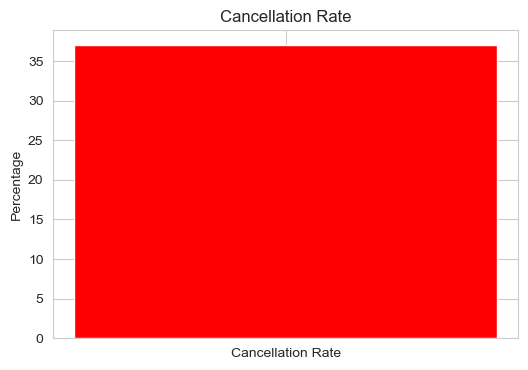

In [27]:
#Cancellation Rate as Percentage of Total Bookings
plt.figure(figsize=(6, 4))
cancellation_rate = df['is_canceled'].sum() / len(df) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")
plt.bar(['Cancellation Rate'], [cancellation_rate], color='red')
plt.ylabel("Percentage")
plt.title("Cancellation Rate")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31460\3145370985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")


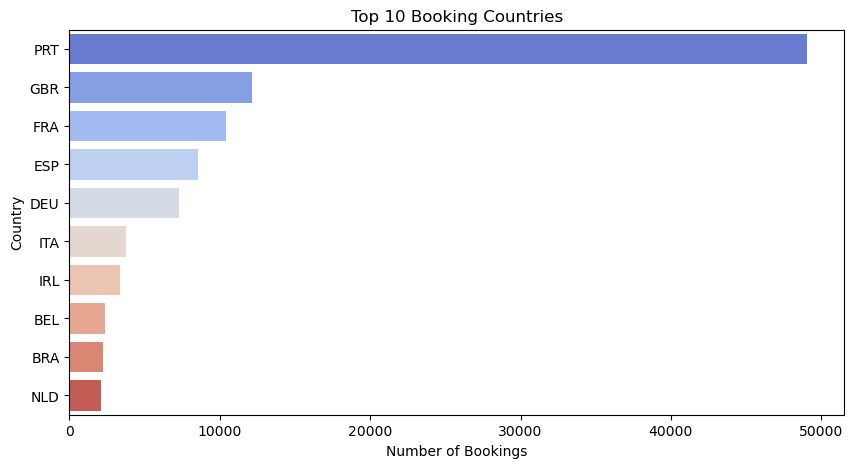

In [9]:
#Geographical Distribution of Bookings
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")
plt.xlabel("Number of Bookings")
plt.ylabel("Country")
plt.title("Top 10 Booking Countries")
plt.show()

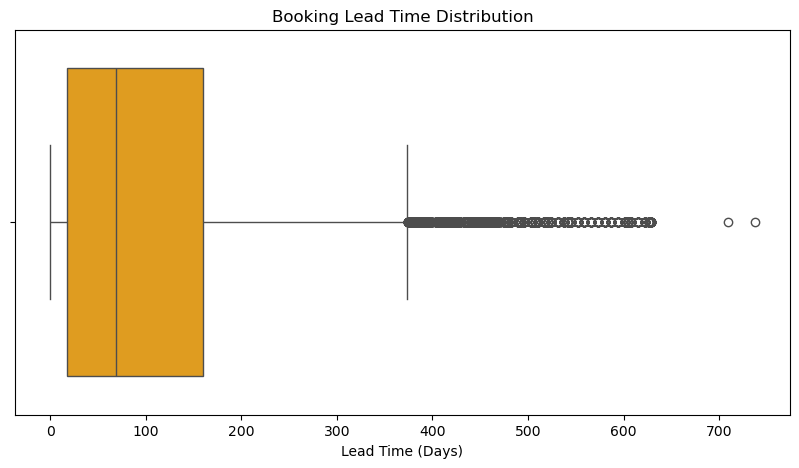

In [11]:
#Booking Lead Time Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['lead_time'], color='orange')
plt.xlabel("Lead Time (Days)")
plt.title("Booking Lead Time Distribution")
plt.show()

In [29]:
lead_time_stats = df['lead_time'].describe()
print(lead_time_stats)

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31460\2027135363.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="magma")


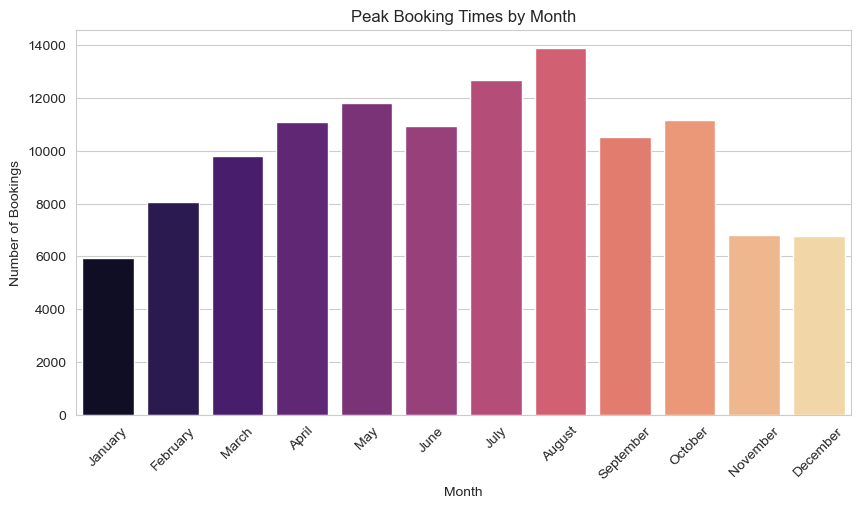

In [21]:
#Peak Booking Times
plt.figure(figsize=(10, 5))
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
month_counts = df['arrival_date_month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values, palette="magma")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Peak Booking Times by Month")
plt.xticks(rotation=45)
plt.show()